# Stage 1: Data Cleaning, Preprocessing and exploratory data analysis including topic modelling

Stage 1: Data cleaning, preprocessing, and exploratory data analysis including topic modelling

In this step, students get a first overview of the dataset and learn to prepare it for the subsequent NLP analyses. This could involve the following tasks:

- Data Collection and Cleaning
     - Acquire a comprehensive dataset of cleantech texts.
     - Perform data cleaning to remove irrelevant information, special characters, and duplicates.
- Text Preprocessing
    - Tokenize the text data into words or phrases.
    - Apply stemming or lemmatization to reduce words to their root form.
    - Remove stop words and non-informative terms.
    - Convert text to lowercase for consistency.
    - Exploratory Data Analysis (EDA)
    - Compute basic statistics such as word counts, document lengths, and term frequencies.
    - Create word clouds to visualize the most frequent terms.
    - Plot histograms or bar charts to analyze the distribution of major cleantech topics and categories.
    - Identify outliers or anomalies in the data.
    - Visualize the distribution of texts with scatter plots or other suitable visualization techniques.
- Topic Modeling
    - Test topic modeling techniques such as LDA and NMF
    (https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF), Top2Vec
    (https://github.com/ddangelov/Top2Vec) and BERTopic
    (https://github.com/MaartenGr/BERTopic).
    - Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.
    - Evaluate the quality of the topics.
    - Refine the topic model based on evaluation results and domain expertise.

Outputs:
- Notebook with data cleaning and preprocessing steps.
- EDA notebook with visualizations on e.g., hidden topics.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re

In [2]:
# Download nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Load the Data

In [3]:
!wget https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
!unzip /content/cleantech_media_dataset_v1_20231109.zip

--2023-11-26 16:29:58--  https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip [following]
--2023-11-26 16:29:58--  https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14880158 (14M) [application/zip]
Saving to: ‘cleantech_media_dataset_v1_20231109.zip’

cleantech_media_dat 100%[===================>]  

In [4]:
df = pd.read_csv("cleantech_media_dataset_v1_20231109.csv")

In [5]:
pd.DataFrame.head(df)

,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...


In [6]:
df.shape

(9607, 7)

In [7]:
df = df.drop_duplicates()
df.shape

(9607, 7)

In [8]:
# Convert content to lower case
df['content'] = df['content'].apply(lambda x: x.lower())

# Remove symbols and punctuation (not sure about this step)
df['content'] = df['content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [9]:
# Tokenize

df['tokenized_content'] = df['content'].map(lambda x: nltk.word_tokenize(x))

In [10]:
# Add word count column

df['word_count'] = df['tokenized_content'].apply(lambda x: len(x))

In [11]:
pd.DataFrame.head(df)

,Unnamed: 0,title,date,author,content,domain,url,tokenized_content,word_count
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,qatar petroleum qp is targeting aggressive cu...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, is, targeting, aggressi...",442
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,nuclear power corp of india ltd npcil synchr...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[nuclear, power, corp, of, india, ltd, npcil, ...",538
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,new us president joe biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, us, president, joe, biden, took, office,...",706
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,the slow pace of japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[the, slow, pace, of, japanese, reactor, resta...",687
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,two of new york citys largest pension funds sa...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[two, of, new, york, citys, largest, pension, ...",394


In [12]:
# Create lemmatizer

lemmatizer = nltk.WordNetLemmatizer()

In [13]:
# Apply lemmatizer

df['tokenized_content'] = df['tokenized_content'].apply(lambda x:
                    [lemmatizer.lemmatize(word) for word in x])

In [14]:
# Remove stops (need to expand stopword list)
stops = set(nltk.corpus.stopwords.words("english"))
df['tokenized_content'] = df['tokenized_content'].apply(lambda x:
                    [token for token in x if token not in stops])

In [15]:
pd.DataFrame.head(df)

,Unnamed: 0,title,date,author,content,domain,url,tokenized_content,word_count
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,qatar petroleum qp is targeting aggressive cu...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, targeting, aggressive, ...",442
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,nuclear power corp of india ltd npcil synchr...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[nuclear, power, corp, india, ltd, npcil, sync...",538
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,new us president joe biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, u, president, joe, biden, took, office, ...",706
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,the slow pace of japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[slow, pace, japanese, reactor, restarts, cont...",687
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,two of new york citys largest pension funds sa...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[two, new, york, city, largest, pension, fund,...",394


In [16]:
# Calculate term frequencies for each record
df['term_frequencies'] = df['tokenized_content'].apply(lambda x:
                        nltk.probability.FreqDist(x))

In [17]:
df

,Unnamed: 0,title,date,author,content,domain,url,tokenized_content,word_count,term_frequencies
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,qatar petroleum qp is targeting aggressive cu...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, targeting, aggressive, ...",442,"{'qatar': 5, 'petroleum': 1, 'qp': 6, 'targeti..."
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,nuclear power corp of india ltd npcil synchr...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[nuclear, power, corp, india, ltd, npcil, sync...",538,"{'nuclear': 4, 'power': 4, 'corp': 1, 'india':..."
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,new us president joe biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, u, president, joe, biden, took, office, ...",706,"{'new': 1, 'u': 20, 'president': 1, 'joe': 1, ..."
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,the slow pace of japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[slow, pace, japanese, reactor, restarts, cont...",687,"{'slow': 1, 'pace': 1, 'japanese': 1, 'reactor..."
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,two of new york citys largest pension funds sa...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[two, new, york, city, largest, pension, fund,...",394,"{'two': 2, 'new': 7, 'york': 7, 'city': 7, 'la..."
...,...,...,...,...,...,...,...,...,...,...
9602,82339,Strata Clean Energy Nets $ 300 Million in Fund...,2023-11-06,NaN,strata clean energy has closed a 300 million ...,solarindustrymag,https://solarindustrymag.com/strata-clean-ener...,"[stratum, clean, energy, ha, closed, 300, mill...",297,"{'stratum': 5, 'clean': 2, 'energy': 5, 'ha': ..."
9603,82340,Orsted Deploying SparkCognition Renewable Suit...,2023-11-07,NaN,global renewable energy developer rsted is dep...,solarindustrymag,https://solarindustrymag.com/orsted-deploying-...,"[global, renewable, energy, developer, rsted, ...",320,"{'global': 1, 'renewable': 8, 'energy': 8, 'de..."
9604,82341,Veolia Has Plans for 5 MW of Solar in Arkansas,2023-11-07,NaN,veolia north america a provider of environment...,solarindustrymag,https://solarindustrymag.com/veolia-has-plans-...,"[veolia, north, america, provider, environment...",345,"{'veolia': 5, 'north': 2, 'america': 2, 'provi..."
9605,82342,"SunEdison: Too Big, Too Fast?",2023-11-08,NaN,once the selfproclaimed leading renewable pow...,solarindustrymag,http://www.solarindustrymag.com/online/issues/...,"[selfproclaimed, leading, renewable, power, pl...",1695,"{'selfproclaimed': 1, 'leading': 1, 'renewable..."


In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
# Join all text to calculate total frequencies
all_tokens_string = ' '.join(df['tokenized_content'].explode())

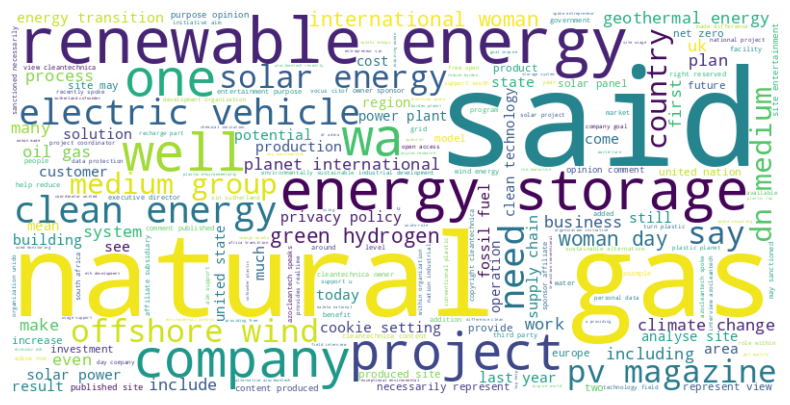

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Expand stopwords list
new_stops = {"said", "result", "come", "one", "much", "work",
             "still", "need", "u"}
stops.update(new_stops)

In [22]:
# Expand stopwords list with another package
from sklearn.feature_extraction import _stop_words as sklearn_stop_words
# Grab standard English stopwords
stop_words = set(sklearn_stop_words.ENGLISH_STOP_WORDS)
# And add in some of our own ("like" is really common and doesn't tell us much)
stop_words = stop_words.union(set([
    "www", "http", "https", "br", "amazon", "href", "wa", "ha",
    "like", "just", "u",
]))
stops.update(stop_words)

In [23]:
# update dataframe
df['tokenized_content'] = df['tokenized_content'].apply(lambda x:
                    [token for token in x if token not in stops])

In [24]:
# Calculate term frequencies for each record
df['term_frequencies'] = df['tokenized_content'].apply(lambda x:
                        nltk.probability.FreqDist(x))
df

,Unnamed: 0,title,date,author,content,domain,url,tokenized_content,word_count,term_frequencies
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,qatar petroleum qp is targeting aggressive cu...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, targeting, aggressive, ...",442,"{'qatar': 5, 'petroleum': 1, 'qp': 6, 'targeti..."
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,nuclear power corp of india ltd npcil synchr...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[nuclear, power, corp, india, npcil, synchroni...",538,"{'nuclear': 4, 'power': 4, 'corp': 1, 'india':..."
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,new us president joe biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, president, joe, biden, took, office, wee...",706,"{'new': 1, 'president': 1, 'joe': 1, 'biden': ..."
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,the slow pace of japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[slow, pace, japanese, reactor, restarts, cont...",687,"{'slow': 1, 'pace': 1, 'japanese': 1, 'reactor..."
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,two of new york citys largest pension funds sa...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, york, city, largest, pension, fund, say,...",394,"{'new': 7, 'york': 7, 'city': 7, 'largest': 1,..."
...,...,...,...,...,...,...,...,...,...,...
9602,82339,Strata Clean Energy Nets $ 300 Million in Fund...,2023-11-06,NaN,strata clean energy has closed a 300 million ...,solarindustrymag,https://solarindustrymag.com/strata-clean-ener...,"[stratum, clean, energy, closed, 300, million,...",297,"{'stratum': 5, 'clean': 2, 'energy': 5, 'close..."
9603,82340,Orsted Deploying SparkCognition Renewable Suit...,2023-11-07,NaN,global renewable energy developer rsted is dep...,solarindustrymag,https://solarindustrymag.com/orsted-deploying-...,"[global, renewable, energy, developer, rsted, ...",320,"{'global': 1, 'renewable': 8, 'energy': 8, 'de..."
9604,82341,Veolia Has Plans for 5 MW of Solar in Arkansas,2023-11-07,NaN,veolia north america a provider of environment...,solarindustrymag,https://solarindustrymag.com/veolia-has-plans-...,"[veolia, north, america, provider, environment...",345,"{'veolia': 5, 'north': 2, 'america': 2, 'provi..."
9605,82342,"SunEdison: Too Big, Too Fast?",2023-11-08,NaN,once the selfproclaimed leading renewable pow...,solarindustrymag,http://www.solarindustrymag.com/online/issues/...,"[selfproclaimed, leading, renewable, power, pl...",1695,"{'selfproclaimed': 1, 'leading': 1, 'renewable..."


In [25]:
# Join all text
all_tokens_string = ' '.join(df['tokenized_content'].explode())

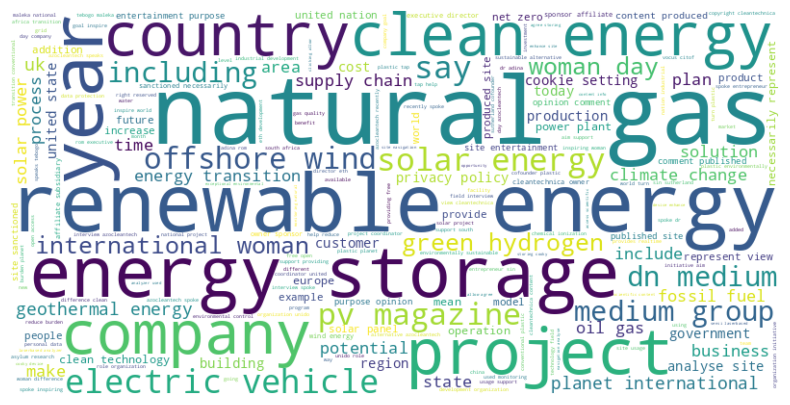

In [26]:
# Create new word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# Get most frequent word for each document
freq_words = [max(term, key=term.get) for term in df['term_frequencies']]

In [28]:
freq_words

['million',
 'project',
 'china',
 'reactor',
 'new',
 'court',
 'energy',
 'china',
 'water',
 'power',
 'nuclear',
 'market',
 'saf',
 'co2',
 'santos',
 'plan',
 'saf',
 'energy',
 'gunvor',
 'energy',
 'nuclear',
 'oil',
 'exxon',
 'energy',
 'wind',
 'energy',
 'carbon',
 'capture',
 'emission',
 'hydrogen',
 'hydrogen',
 'cost',
 'shell',
 'repsol',
 'carbon',
 'nuclear',
 'company',
 'chevron',
 'nuclear',
 'gw',
 'nuclear',
 'project',
 'carbonneutral',
 'project',
 'return',
 'power',
 'bp',
 'duke',
 'decommissioning',
 'shale',
 'hydrogen',
 'shipping',
 'hydrogen',
 'nuclear',
 'bd',
 'transborders',
 'energy',
 'reactor',
 'climate',
 'pertamina',
 'lng',
 'lng',
 'share',
 'energy',
 'russia',
 'lng',
 'state',
 'lng',
 'phillips',
 'ecopetrol',
 'padmanathan',
 'biden',
 'green',
 'bd',
 'chevron',
 'battery',
 'fusion',
 'china',
 'water',
 'emission',
 'gazprom',
 'production',
 'energy',
 'cc',
 'hydrogen',
 'climate',
 'russia',
 'repsol',
 'hydrogen',
 'hydrogen',
 

## Word2Vec Modeling

In [29]:
# Train your own embedding space using the word2vec architecture

from gensim.models import Word2Vec

# Set values for various parameters
feature_size = 100  # Word vector dimensionality
window_context = 5  # Context window size
min_word_count = 5  # Minimum word count

w2vmodel = Word2Vec(sentences=df['tokenized_content'], vector_size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

In [30]:
# Inspect most similar words to, e.g., carbon, gas, energy, solar
# This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model.

w2vmodel.wv.most_similar('energy', topn=5)

[('electricity', 0.5380646586418152),
 ('power', 0.49151095747947693),
 ('complement', 0.4616442024707794),
 ('intermittent', 0.43950164318084717),
 ('resource', 0.412825345993042)]

In [31]:
# Compute similarity between two words in the vocabulary by invoking the similarity() function and passing in the relevant words
w2vmodel.wv.similarity('energy', 'fuel')

0.3173255

In [32]:
w2vmodel.wv.similarity('carbon', 'gas')

0.18008618

In [33]:
w2vmodel.wv.similarity('wind', 'turbine')

0.2855323

In [34]:
# View similar words based on gensim's model
similar_words = {
    search_term:
    [item[0] for item in w2vmodel.wv.most_similar([search_term], topn=5)]
    for search_term in ['energy', 'fuel','gas', 'carbon', 'oil', 'wind']
}
similar_words

{'energy': ['electricity', 'power', 'complement', 'intermittent', 'resource'],
 'fuel': ['fuelpowered',
  'fuelfired',
  'fuelbased',
  'fuelderived',
  'fuelburning'],
 'gas': ['gasrelated', 'crude', 'gasfired', 'horticulture', 'spill'],
 'carbon': ['co2', 'zincmanganese', 'ghg', 'moderateincome', 'directair'],
 'oil': ['silane', 'flared', 'natural', 'petroleum', 'upstream'],
 'wind': ['aurelia', 'windfarms', 'aquafarming', 'tidal', 'solarduck']}

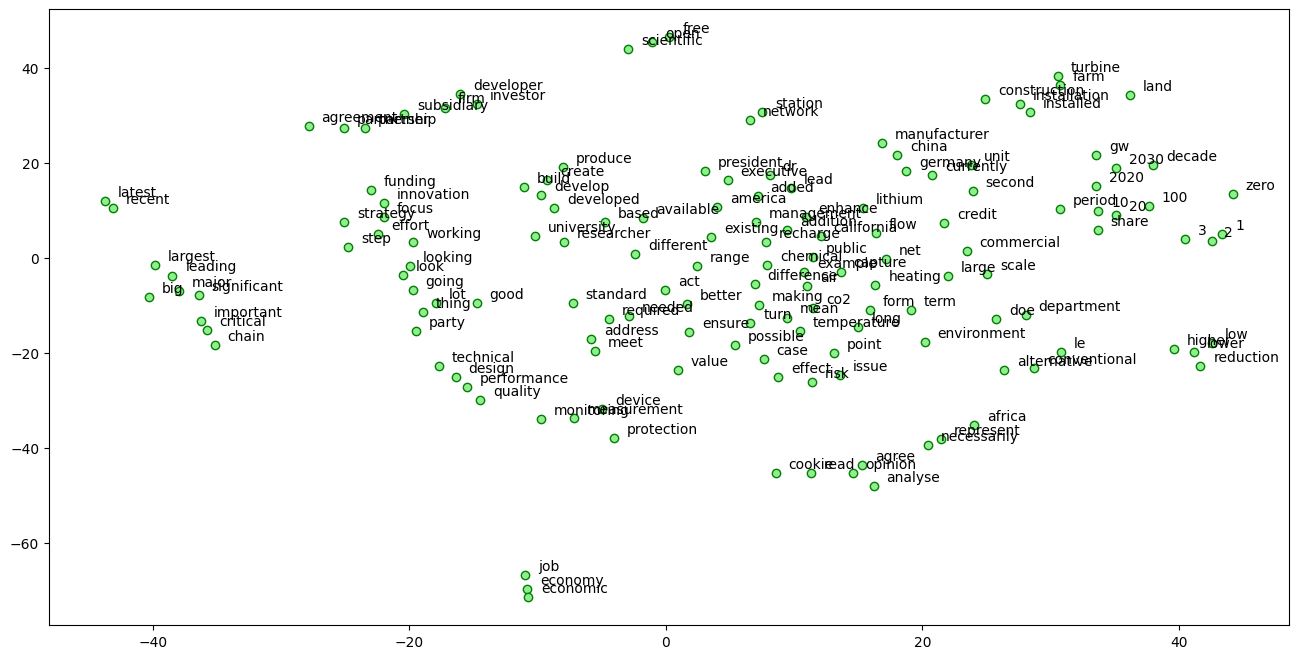

In [35]:
from sklearn.manifold import TSNE

words = w2vmodel.wv.index_to_key[200:350]      ## get the word forms of voculary sample
wvs = w2vmodel.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(16, 8))
plt.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(0, 0),
                 textcoords='offset points')

In [36]:
# Select topn similar words to a given token

def display_closestwords_tsnescatterplot(model, word, size):

    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word, topn=75)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(15, 8))
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

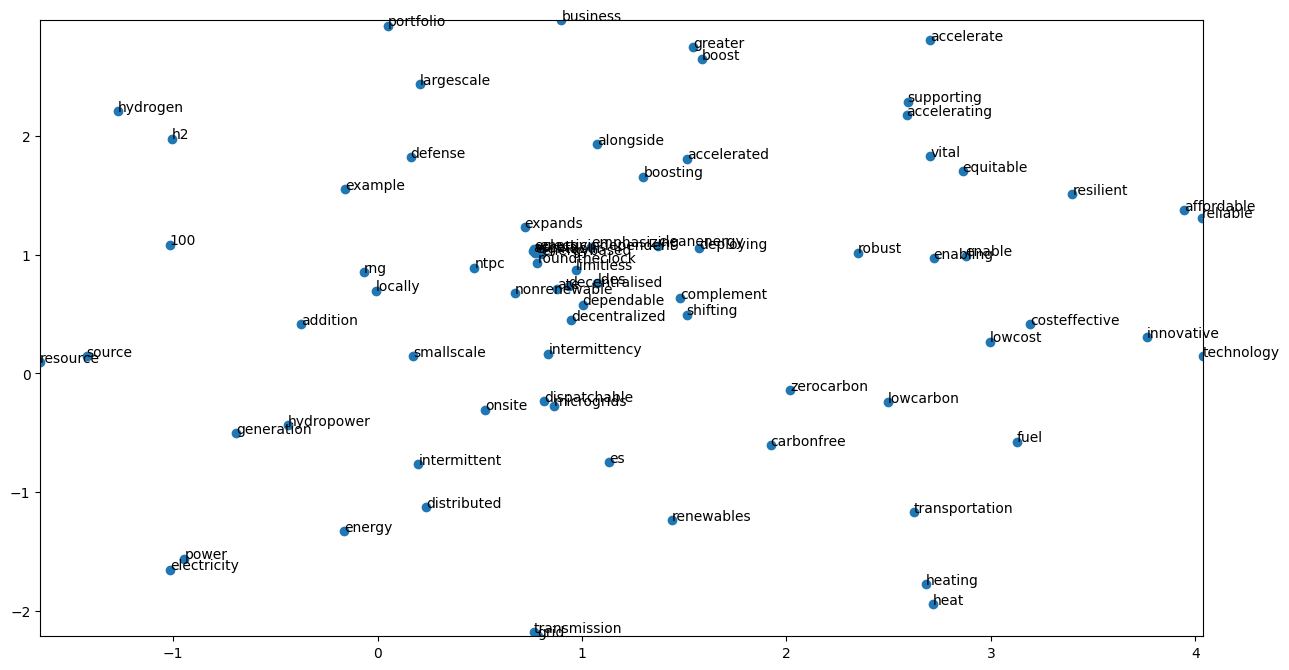

In [37]:
# Inspect the most similar (play with topn if you like) and change the input token 'red' to other tokens
display_closestwords_tsnescatterplot(w2vmodel, 'energy',100)

The closest synonyms surround the term "energy" in the upper middle sectione of the plot. Verbs applied to the term are located in the center middle and lower sections of the plot (i.e. decentralized, boosting, advancing, etc) while descriptive adjectives are in the upper right (i.e. lowcost, flexible, robust, etc). Nouns are more widely dispersed throughout the chart but higher concentrations can be seen on the edges of the plot (i.e. source, hydrogen, heat, elecricity).

## Doc2Vec Modeling

Compares Doc2Vec domain regression with text vectorization regression. May change this later.

In [38]:
# Train your own embedding space using the doc2vec architecture

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.doc2vec import TaggedDocument
from sklearn import preprocessing
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
# Clean the data a little bit and preprocess (another way to create a string with all the tokens)
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags,
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.remove_stopwords ,
           gsp.strip_short,
          ]

def clean_text(dataset):
    dataset = dataset.lower()
    dataset = utils.to_unicode(dataset)
    for f in filters:
        dataset = f(dataset)
    return dataset

In [40]:
# Apply preprocessing to the descriptions
df = df.copy()
df['clean_text'] = df['content'].apply(clean_text)

In [41]:
df

,Unnamed: 0,title,date,author,content,domain,url,tokenized_content,word_count,term_frequencies,clean_text
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,qatar petroleum qp is targeting aggressive cu...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, targeting, aggressive, ...",442,"{'qatar': 5, 'petroleum': 1, 'qp': 6, 'targeti...",qatar petroleum targeting aggressive cuts gree...
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,nuclear power corp of india ltd npcil synchr...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[nuclear, power, corp, india, npcil, synchroni...",538,"{'nuclear': 4, 'power': 4, 'corp': 1, 'india':...",nuclear power corp india npcil synchronized ka...
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,new us president joe biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, president, joe, biden, took, office, wee...",706,"{'new': 1, 'president': 1, 'joe': 1, 'biden': ...",new president joe biden took office week uschi...
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,the slow pace of japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[slow, pace, japanese, reactor, restarts, cont...",687,"{'slow': 1, 'pace': 1, 'japanese': 1, 'reactor...",slow pace japanese reactor restarts continues ...
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,two of new york citys largest pension funds sa...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, york, city, largest, pension, fund, say,...",394,"{'new': 7, 'york': 7, 'city': 7, 'largest': 1,...",new york citys largest pension funds divest ro...
...,...,...,...,...,...,...,...,...,...,...,...
9602,82339,Strata Clean Energy Nets $ 300 Million in Fund...,2023-11-06,NaN,strata clean energy has closed a 300 million ...,solarindustrymag,https://solarindustrymag.com/strata-clean-ener...,"[stratum, clean, energy, closed, 300, million,...",297,"{'stratum': 5, 'clean': 2, 'energy': 5, 'close...",strata clean energy closed 300 million revolvi...
9603,82340,Orsted Deploying SparkCognition Renewable Suit...,2023-11-07,NaN,global renewable energy developer rsted is dep...,solarindustrymag,https://solarindustrymag.com/orsted-deploying-...,"[global, renewable, energy, developer, rsted, ...",320,"{'global': 1, 'renewable': 8, 'energy': 8, 'de...",global renewable energy developer rsted deploy...
9604,82341,Veolia Has Plans for 5 MW of Solar in Arkansas,2023-11-07,NaN,veolia north america a provider of environment...,solarindustrymag,https://solarindustrymag.com/veolia-has-plans-...,"[veolia, north, america, provider, environment...",345,"{'veolia': 5, 'north': 2, 'america': 2, 'provi...",veolia north america provider environmental so...
9605,82342,"SunEdison: Too Big, Too Fast?",2023-11-08,NaN,once the selfproclaimed leading renewable pow...,solarindustrymag,http://www.solarindustrymag.com/online/issues/...,"[selfproclaimed, leading, renewable, power, pl...",1695,"{'selfproclaimed': 1, 'leading': 1, 'renewable...",selfproclaimed leading renewable power plant d...


In [42]:
# Converting the catergory labels into numeric values using LabelEncoder
labelEncoder = preprocessing.LabelEncoder()
df['domain_id'] = labelEncoder.fit_transform(df['domain'])
print(df['domain_id'].value_counts())

2     1861
0     1627
11    1215
6     1020
14     673
10     659
18     646
13     559
16     505
5      234
12     232
1      158
8       80
4       38
15      34
7       28
3       19
17      17
9        2
Name: domain_id, dtype: int64


In [43]:
# Splitting the dataset into Training and Testing Data
train_text, test_text, train_labels, test_labels = train_test_split(df["clean_text"], df["domain_id"], train_size=0.7, random_state=5)

print("Train x size :", train_text.shape)
print("Train y size :", train_labels.shape)
print("Test x size :", test_text.shape)
print("Test y size :", test_labels.shape)

Train x size : (6724,)
Train y size : (6724,)
Test x size : (2883,)
Test y size : (2883,)


In [44]:
# Take a look at the test data
test_text[:1]

295    tnb renewables subsidiary malaysian national e...
Name: clean_text, dtype: object

### Text Vectorization

In [45]:
# Text Vectorization
# Create BoW features
countVector = CountVectorizer(min_df=2)

# Extracting train and test features
trainFeatureSet = countVector.fit_transform(train_text)
testFeatureSet = countVector.transform(test_text)

In [46]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(train_text)
tfidTestFeatures = tfIdVector.transform(test_text)

In [47]:
# Split data into train and test
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [48]:
model_lg = LogisticRegression()
model_lg.fit(trainFeatureSet, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
from sklearn.model_selection import cross_val_score
model_lg_acc = cross_val_score(estimator=model_lg, X=trainFeatureSet, y=train_labels, cv=5, n_jobs=-1)
model_lg_acc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.96208178, 0.95241636, 0.96505576, 0.96431227, 0.96130952])

In [50]:
print(model_lg.score(testFeatureSet, test_labels))

0.9687825182101977


### Building Doc2Vec model

In [51]:
# We create a TaggedDocument object as Doc2Vec expects it as input using previous variable
train_tag = train.apply(lambda x: TaggedDocument(words=word_tokenize(x['clean_text']), tags=[x.domain]),axis=1)
test_tag = test.apply(lambda x: TaggedDocument(words=word_tokenize(x['clean_text']), tags=[x.domain]), axis=1)

In [52]:
pd.set_option('display.max_colwidth', None)
print(train_tag[2:4])

8313       ([despite, concerns, supply, chain, interruptions, tariff, investigations, solar, industry, saw, record, solar, storage, demand, 2021, particular, residential, market, grew, reflected, increased, installation, numbers, recorded, year, solar, contractors, class, solar, power, world, solar, industry, leading, businesstobusiness, publication, today, released, 2022, solar, contractors, list, recognized, annual, listing, solar, contractors, united, states, working, utility, commercial, residential, markets, utilityscale, solar, market, course, puts, huge, installation, numbers, year, majority, workers, industry, constructing, projects, commercial, residential, markets, continue, break, records, said, kelly, pickerel, editor, chief, solar, power, world, companies, 2022, solar, contractors, list, primarily, work, residential, commercial, sectors, reported, closing, year, positive, light, according, data, released, ...], [solarpowerworldonline])
7837    ([oxford, nanosystems, ons, s

In [53]:
doc_model = Doc2Vec(dm=0, vector_size=100, min_count=3, window=5, sample = 0)

doc_model.build_vocab(train_tag)

In [54]:
# Check vocabulary size
doc_model.corpus_total_words

2800148

In [55]:
# Training for 30 epochs
%time
doc_model.train(train_tag, total_examples=doc_model.corpus_count, epochs=30)


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.68 µs


In [56]:
# Building the vector feature for the classifier:
def vector_for_learning(model, documents):
    sentences = documents
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, epochs=20)) for doc in sentences])
    return targets, feature_vectors

In [57]:
y_train, X_train = vector_for_learning(doc_model, train_tag)
y_test, X_test = vector_for_learning(doc_model, test_tag)

In [58]:
# Checkout our best performing model: lg. Can we improve it?
model_lg_doc2vec = LogisticRegression()
model_lg_doc2vec.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Results

In [59]:
# Compare text vectorization with lg
print(model_lg.score(testFeatureSet, test_labels))
print(model_lg_doc2vec.score(X_test, y_test))

0.9687825182101977
0.9621921609434617


In [60]:
import sklearn.metrics as metrics
predicted = model_lg_doc2vec.predict(X_test)
print(metrics.classification_report(y_test, predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

         azocleantech       1.00      1.00      1.00       492
        businessgreen       0.96      0.53      0.69        45
        cleantechnica       0.98      1.00      0.99       560
            decarbxpo       1.00      1.00      1.00         4
            ecofriend       1.00      0.71      0.83        14
          energyintel       1.00      0.63      0.77        84
          energyvoice       0.81      0.97      0.88       304
            eurosolar       1.00      0.83      0.91         6
         greenprophet       0.94      0.75      0.83        20
          indorenergy       0.00      0.00      0.00         1
      naturalgasintel       0.99      1.00      0.99       203
          pv-magazine       0.97      1.00      0.98       353
              pv-tech       0.95      0.78      0.85        68
         rechargenews       0.99      1.00      1.00       169
     solarindustrymag       0.99      0.99      0.99  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Top2Vec

In [61]:
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039168 sha256=1b42ff28030a69778a0ee72a28123825437e1066aa5668fb1d2099457f3606d7
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=58afee7a4403f91785df1e89fad7189a297341139acc3df31932af47e7aa71ca
  Stored in directory: /root/.cac

In [62]:
!pip install tensorflow --upgrade

In [63]:
from top2vec import Top2Vec
import tensorflow

# Create a list of documents
documents = df['clean_text'].tolist()

In [64]:
# Initialize Top2Vec model
model = Top2Vec(documents, speed="learn", workers=4)

2023-11-26 16:42:11,463 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-11-26 16:42:26,596 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2023-11-26 16:42:32,429 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-26 16:45:57,367 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-11-26 16:46:40,266 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-11-26 16:46:40,594 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [67]:
model.save("top2vec_1")
model = Top2Vec.load("top2vec_1")

In [88]:
# Get topics
topics = model.get_topics()

In [87]:
# Get number of topics
model.get_num_topics()

56

In [114]:
# Get topic size
# This will return the number of documents most similar to each topic. Topics are in decreasing order of size.
topic_sizes, topic_nums = model.get_topic_sizes()
for topic_size, topic_num in zip(topic_sizes[::], topic_nums[::]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")

Topic Num 0 has 779 documents.
Topic Num 1 has 663 documents.
Topic Num 2 has 624 documents.
Topic Num 3 has 606 documents.
Topic Num 4 has 380 documents.
Topic Num 5 has 351 documents.
Topic Num 6 has 350 documents.
Topic Num 7 has 314 documents.
Topic Num 8 has 298 documents.
Topic Num 9 has 269 documents.
Topic Num 10 has 251 documents.
Topic Num 11 has 219 documents.
Topic Num 12 has 215 documents.
Topic Num 13 has 207 documents.
Topic Num 14 has 185 documents.
Topic Num 15 has 184 documents.
Topic Num 16 has 184 documents.
Topic Num 17 has 177 documents.
Topic Num 18 has 166 documents.
Topic Num 19 has 155 documents.
Topic Num 20 has 146 documents.
Topic Num 21 has 142 documents.
Topic Num 22 has 141 documents.
Topic Num 23 has 141 documents.
Topic Num 24 has 134 documents.
Topic Num 25 has 123 documents.
Topic Num 26 has 122 documents.
Topic Num 27 has 116 documents.
Topic Num 28 has 112 documents.
Topic Num 29 has 108 documents.
Topic Num 30 has 100 documents.
Topic Num 31 has 9

In [117]:
# Get topics
# topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.
# word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.
# topic_nums: The unique index of every topic will be returned.

topic_words, word_scores, topic_nums = model.get_topics(56)
for words, score, top_id in zip(topic_words, word_scores, topic_nums):
    print(f"Document: {top_id}, Score: {score}")
    print("-----------")
    print(words)
    print("-----------")
    print()

Document: 0, Score: [0.4297058  0.42159787 0.41955242 0.39652047 0.38981727 0.33041102
 0.32465544 0.32181072 0.31757617 0.30750775 0.30611756 0.30313382
 0.30021998 0.2989491  0.28983855 0.28614336 0.2839906  0.2836924
 0.2761457  0.26525867 0.25983146 0.2508241  0.2476584  0.24169075
 0.23219861 0.23100409 0.22799215 0.22581853 0.22558378 0.22521587
 0.20540972 0.1992271  0.19893813 0.19820933 0.19765529 0.19721237
 0.19522317 0.19441907 0.19382164 0.19381958 0.19295484 0.19259691
 0.19072773 0.18915296 0.18869731 0.1886901  0.1883794  0.18837403
 0.1852799  0.18257533]
-----------
['solar' 'solarpowered' 'solarpower' 'solarapp' 'solarize' 'solaredge'
 'solarstorage' 'agrivoltaic' 'photovoltaic' 'geoenergy' 'thinkgeoenergy'
 'agrivoltaics' 'renewables' 'photovoltaics' 'energies' 'energie'
 'totalenergies' 'energys' 'energy' 'bioenergy' 'sunpower' 'sun'
 'sunlight' 'cleanenergy' 'renewable' 'gigawatt' 'energyintensive'
 'electricity' 'sunshine' 'geothermal' 'terawatt' 'photosynthesis'

In [121]:
# Get the topic numbers and words and scores for a specific topic
topic_sizes, topic_nums = model.get_topic_sizes()
topic_words, word_scores, topic_num = model.get_topics(56)

# Create an empty list to store the results
topics_data = []

# Iterate over topics
for i in range(len(topic_nums)):
    # Get words, word scores, and topic number for the current topic
    topic_words, word_scores, topic_num = model.get_topics(topic_nums[i])

    # Append the information for the current topic to the list
    topics_data.append({'topic_nums': topic_num, 'topic_words': topic_words, 'word_scores': word_scores})

# Create a DataFrame from the list of dictionaries
topics_df = pd.DataFrame(topics_data)

# Display the results DataFrame
print(topics_df)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [116]:
# For each of the returned documents we are going to print its content, score and document number.
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=55, num_docs=24)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 7296, Score: 0.9140594005584717
-----------
scientists germany identified main challenges preventing aqueous zincion batteries zibs mainstream storage technology power grid applications according analysis main hurdles overcome future research increase specific energy znion cell prevention parasitic hydrogen evolution reaction occurring electrodeposition step aqueous zincion battery technology currently far large scale commercialization different materials battery chemistries investigation fulfill worlds growing need energy storage applications zincion lagged challenges controlling reactions limit reversible charging anode cause cathode fall apart zincion potential good energy storage performance cheap abundant materials mind group researchers university bremen germany evaluated barriers currently preventing aqueous zincion batteries zibs mainstream storage technology power grid applications order boost commercialization aqueous zibs cheap safe storage devices stationary grid 

In [108]:
# Get the topic sizes and topic numbers
topic_sizes, topic_nums = model.get_topic_sizes()

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['documents', 'document_scores', 'document_ids', 'topic'])

# Iterate over topics
for i in range(len(topic_sizes)):
    # Get documents, document scores, and document IDs for the current topic
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=i, num_docs=topic_sizes[i])

    # Create a DataFrame for the current topic
    topic_df = pd.DataFrame({'documents': documents, 'document_scores': document_scores, 'document_ids': document_ids, 'topic': i})

    # Append the DataFrame for the current topic to the results DataFrame
    results_df = pd.concat([results_df, topic_df], ignore_index=True)

# Display the results DataFrame
results_df


documents  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                alliant energy public utility holding company provides regulated energy service customers iowa wisconsin says plans add 414 solar wisconsin rounds company previously announced plan accelerate transition clean energy adding 1000 solar helping customers avoid billion longterm costs completion 1000 solar alliant energy operate solar energy state wisconsin guided purposedriven strategy serve customers build strong communities accelerating transition cleaner energy says david leon president alliant energy wisconsin energy company continued transition smart investment benefitting customers longterm creating hundreds jobs state providing local communities sharedrevenues new projects developed rural parts dodge grant green rock waushara counties projects operational local communities receive estimated million shared revenues years use variety ways funding local departments investing school programs upgrading 

In [112]:
!docker pull ddangelov/restful-top2vec

/bin/bash: line 1: docker: command not found
